# Figure 1
Notebook with data, preprocsesing and plotting of the Figure 1 panels

### Figure 1A

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data loading and preprocessing

In [2]:
# Load the dataset
file_path = 'data/Tegel.proteins.dt.csv'  # Adjust the path if necessary
protein_data = pd.read_csv(file_path)

# Replace NaN values in the "Protein.amount..µg." column with 0
protein_data["Protein.amount..µg."] = protein_data["Protein.amount..µg."].fillna(0)

# Extract the relevant column
updated_protein_amounts = protein_data["Protein.amount..µg."]

# Calculate cumulative frequency
sorted_updated_amounts = np.sort(updated_protein_amounts)
updated_cumulative_freq = np.arange(1, len(sorted_updated_amounts) + 1) / len(sorted_updated_amounts) * 100

# Calculate the percentage of proteins with a value of 0
zero_percentage = (updated_protein_amounts == 0).sum() / len(updated_protein_amounts) * 100

#### Plotting

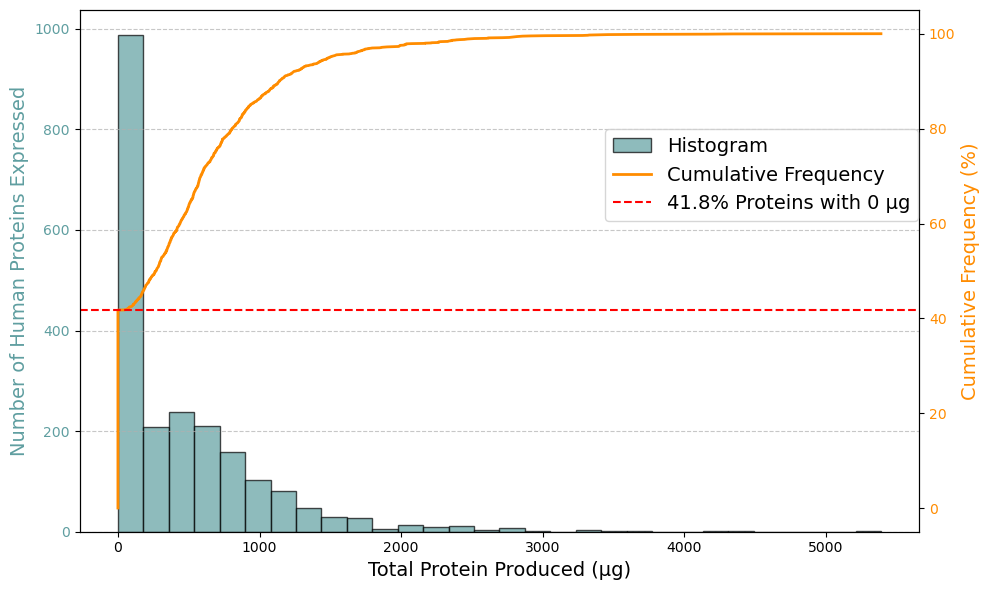

In [25]:
# Plot the histogram and cumulative frequency together
fig, ax1 = plt.subplots(figsize=(10, 6))

# Histogram
color_hist = 'cadetblue'
ax1.hist(updated_protein_amounts, bins=30, edgecolor='black', alpha=0.7, color=color_hist, label='Histogram')
ax1.set_xlabel("Total Protein Produced (µg)", fontsize=14)
ax1.set_ylabel("Number of Human Proteins Expressed", color=color_hist, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color_hist)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Cumulative frequency
ax2 = ax1.twinx()
color_cumul = 'darkorange'
ax2.plot(sorted_updated_amounts, updated_cumulative_freq, color=color_cumul, label='Cumulative Frequency', linewidth=2)
ax2.axhline(y=zero_percentage, color='red', linestyle='--', label=f'{zero_percentage:.1f}% Proteins with 0 µg')
ax2.set_ylabel("Cumulative Frequency (%)", color=color_cumul, fontsize=14)
ax2.tick_params(axis='y', labelcolor=color_cumul)

# Adjust legend position and size
fig.legend(loc='center left', bbox_to_anchor=(0.6, 0.7), fontsize=14)

# Adjust layout
fig.tight_layout()

# Display the plot
plt.show()

### Figure 1 B